# Real Estate Price Prediction

This project builds a machine learning model to predict real estate prices based on features such as location, number of bedrooms (BHK), bathrooms, and total area.

## Acknowledgment
This project is based on the [Codebasics Real Estate Price Prediction tutorial series](https://www.youtube.com/c/codebasics). 

### Unique Features
As an addition, this implementation includes an **interactive prediction feature**:
- A dropdown menu for location selection.
- Sliders for inputting BHK, bathrooms, and area size.
- A button to calculate and display the predicted price.


## Data Loading and Exploration

In this section:
- Load the dataset into a DataFrame.
- Explore the dataset to understand its structure, missing values, and key insights.


In [90]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]= (20,10)

In [91]:
data = pd.read_csv("bengaluru_house_prices.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [93]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [94]:
data["area_type"].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [95]:
data_new = data.drop(["area_type","availability","society","balcony"],axis = 1)

In [96]:
data_new.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Data Preprocessing

Steps include:
- Handling missing values.
- Encoding categorical variables.
- Feature scaling (if required).


In [97]:
data_new.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [98]:
data_1 = data_new.dropna()

In [99]:
data_1.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [100]:
data_1['bhk'] = data_1['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Admin\AppData\Local\Temp\ipykernel_8904\33960169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['bhk'] = data_1['size'].apply(lambda x: int(x.split(' ')[0]))


In [101]:
data_1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [102]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


In [103]:
data_1["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [104]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [105]:
data_1[~data_1["total_sqft"].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [106]:
def convert_sqft_to_num(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0]) + float(token[1])) /2
    try:
        return float(x)
    except:
        return None
        

In [107]:
convert_sqft_to_num('500 - 700')

600.0

In [108]:
data_2 = data_1.copy()

In [109]:
data_2["total_sqft"] = data_2["total_sqft"].apply(convert_sqft_to_num)

In [110]:
data_2.iloc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [111]:
data_3 = data_2.copy()

In [112]:
data_3["price_per_sqft"] = data_3["price"] * 100000 / data_3["total_sqft"]

In [113]:
data_3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [114]:
data_3["location"].value_counts()

location
Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Double Road            1
Adarsh Nagar           1
Tharabanahalli         1
pavitra paradise       1
Shauhardha Layout      1
Name: count, Length: 1304, dtype: int64

In [115]:
data_3.location = data_3["location"].apply(lambda x: x.strip())

location_statistics = data_3.groupby('location')["location"].agg('count').sort_values(ascending = False)
location_statistics

location
Whitefield                   535
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               266
Thanisandra                  236
                            ... 
adigondanhalli                 1
akshaya nagar t c palya        1
anjananager magdi road         1
arudi                          1
2Electronic City Phase II      1
Name: location, Length: 1293, dtype: int64

In [116]:
locations_stats_less_than_10 = location_statistics[location_statistics<=10]

In [117]:
locations_stats_less_than_10

location
Ganga Nagar                  10
Gunjur Palya                 10
BTM 1st Stage                10
Sadashiva Nagar              10
Kalkere                      10
                             ..
adigondanhalli                1
akshaya nagar t c palya       1
anjananager magdi road        1
arudi                         1
2Electronic City Phase II     1
Name: location, Length: 1052, dtype: int64

In [118]:
data_3.location  = data_3["location"].apply(lambda x : 'other' if x in locations_stats_less_than_10 else x)

In [119]:
data_3["location"].value_counts()

location
other                        2881
Whitefield                    535
Sarjapur  Road                392
Electronic City               304
Kanakpura Road                266
                             ... 
Tindlu                         11
Marsur                         11
2nd Phase Judicial Layout      11
Thyagaraja Nagar               11
HAL 2nd Stage                  11
Name: count, Length: 242, dtype: int64

In [120]:
data_3.shape

(13246, 7)

In [121]:
data_4 = data_3[~(data_3.total_sqft/data_3.bhk<300)]
data_4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [122]:
data_4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [123]:
data_4.shape

(12502, 7)

In [124]:
def remove_pricepersqft_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - sd)) & (subdf.price_per_sqft <= (m + sd))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out

data_5 = remove_pricepersqft_outliers(data_4)
data_5.shape
        
    
    
    

(10241, 7)

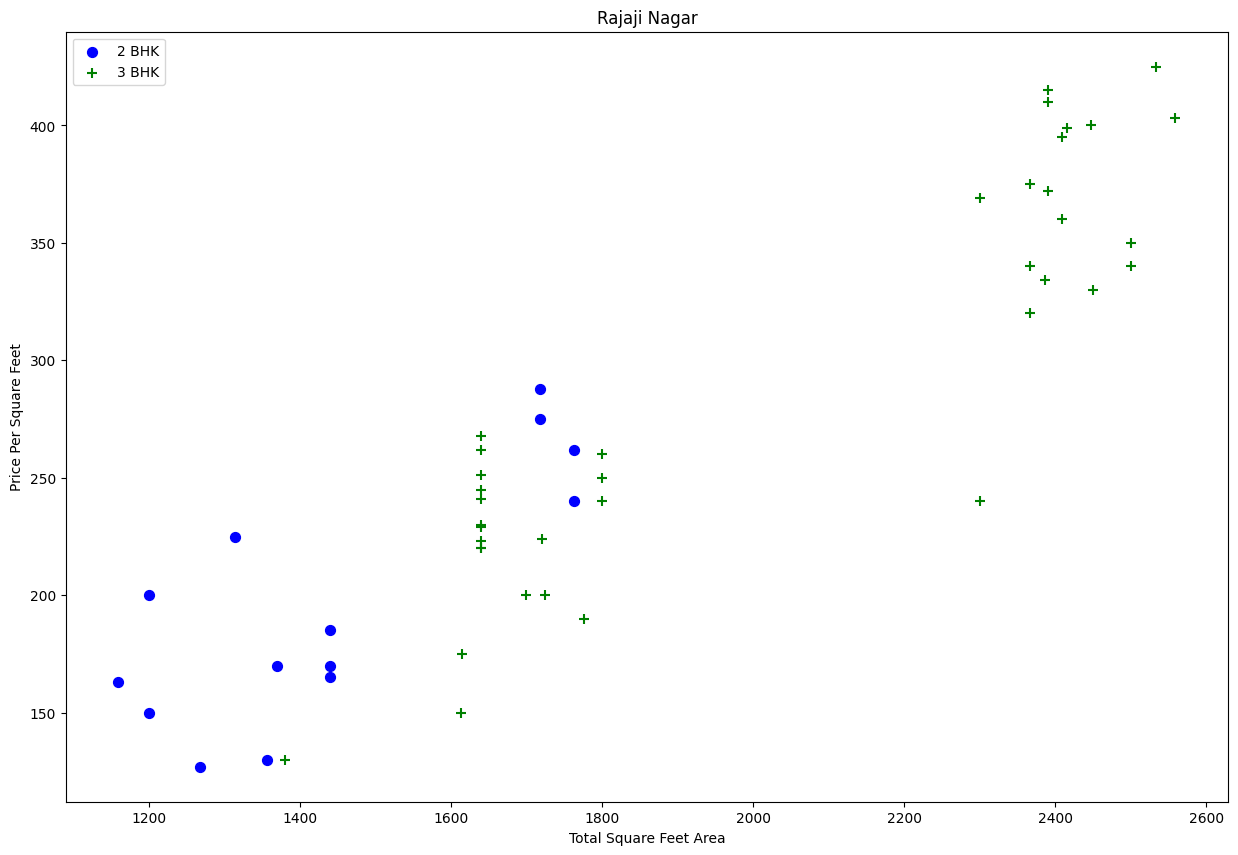

In [125]:
def plot_scatter_chart(df, location): 
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)] 
    matplotlib.rcParams['figure.figsize'] = (15,10) 
    plt.scatter(bhk2.total_sqft, bhk2.price,color='blue', label='2 BHK', s=50) 
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color='green', label='3 BHK', s=50) 
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet") 
    plt.title(location)
    plt.legend()

plot_scatter_chart(data_5, "Rajaji Nagar")

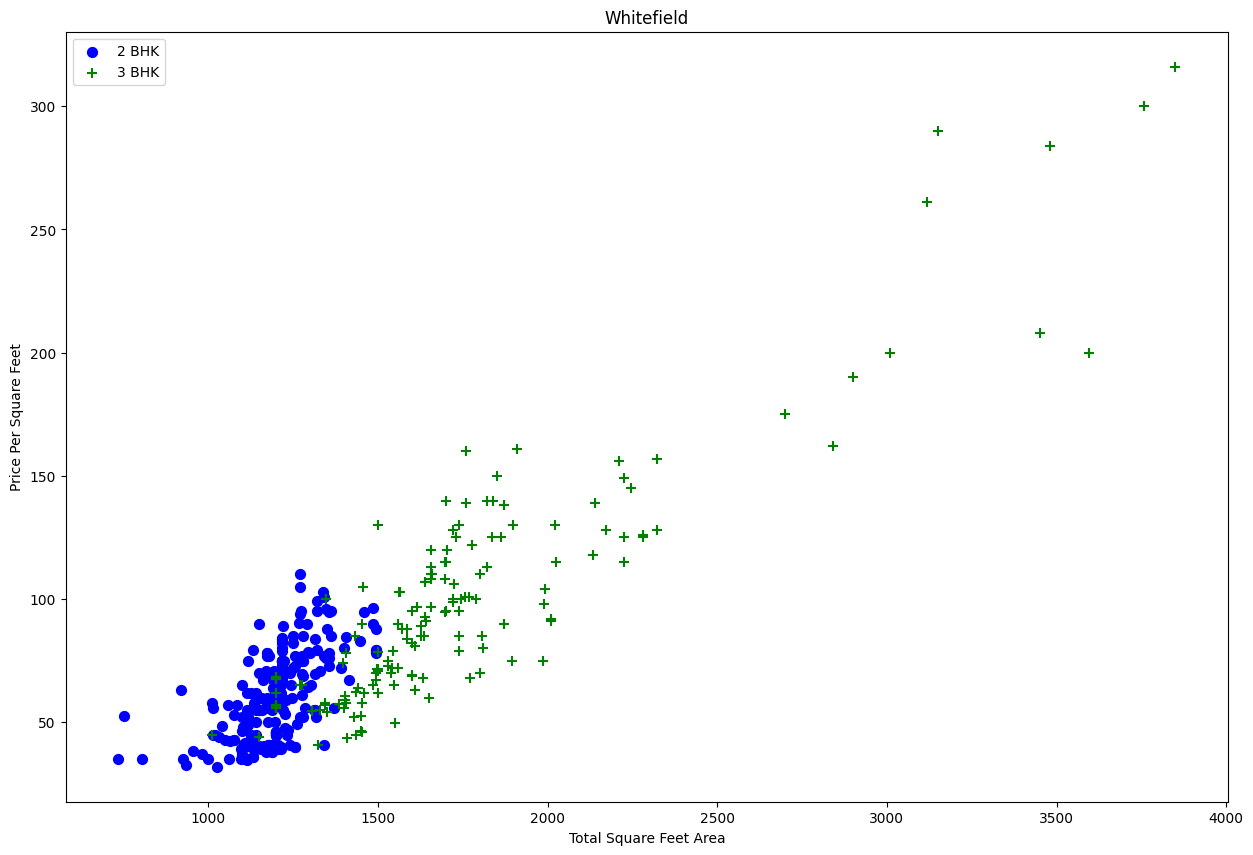

In [126]:
plot_scatter_chart(data_5, "Whitefield")

In [127]:
data_5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10236,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10238,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10239,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [128]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
data_6 = remove_bhk_outliers(data_5)
# df8 = df7.copy()
data_6.shape

(7329, 7)

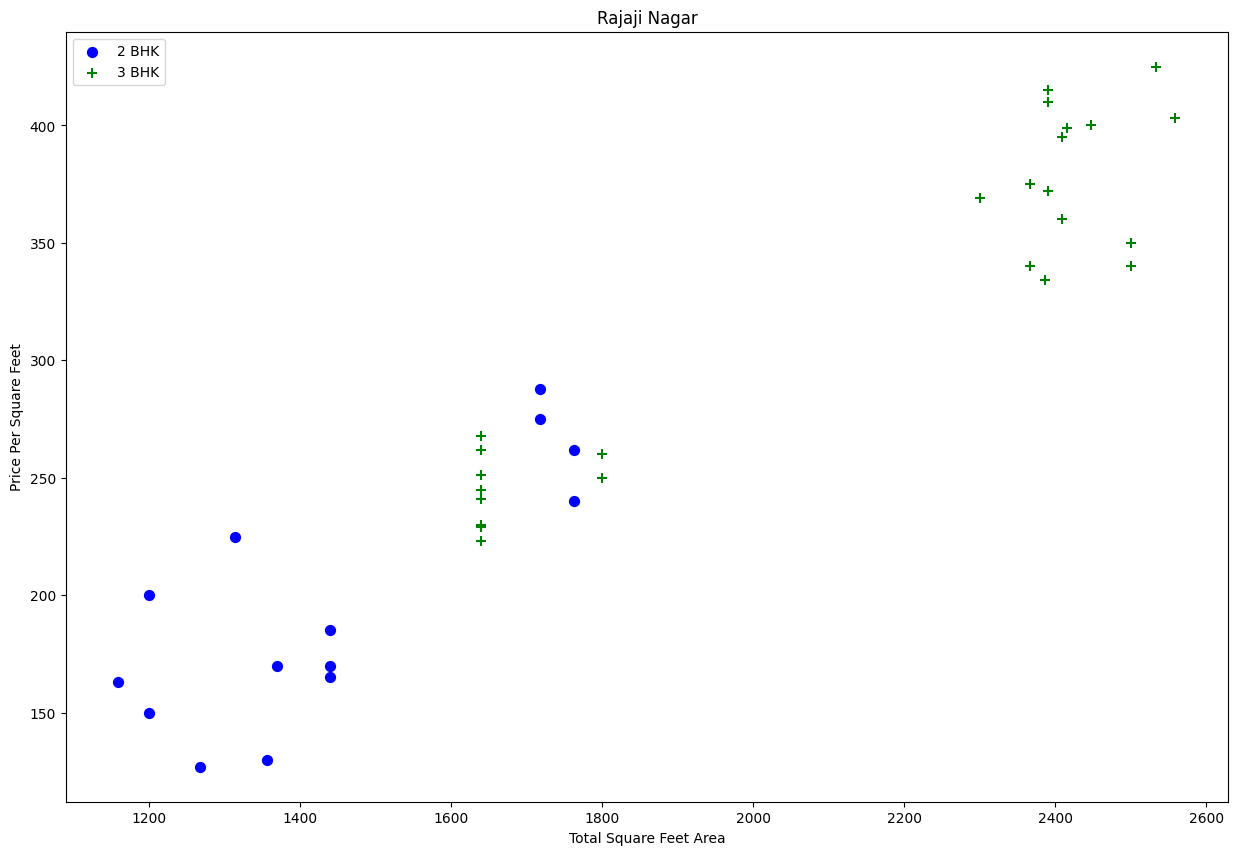

In [129]:
plot_scatter_chart(data_6, "Rajaji Nagar")

Text(0, 0.5, 'Count')

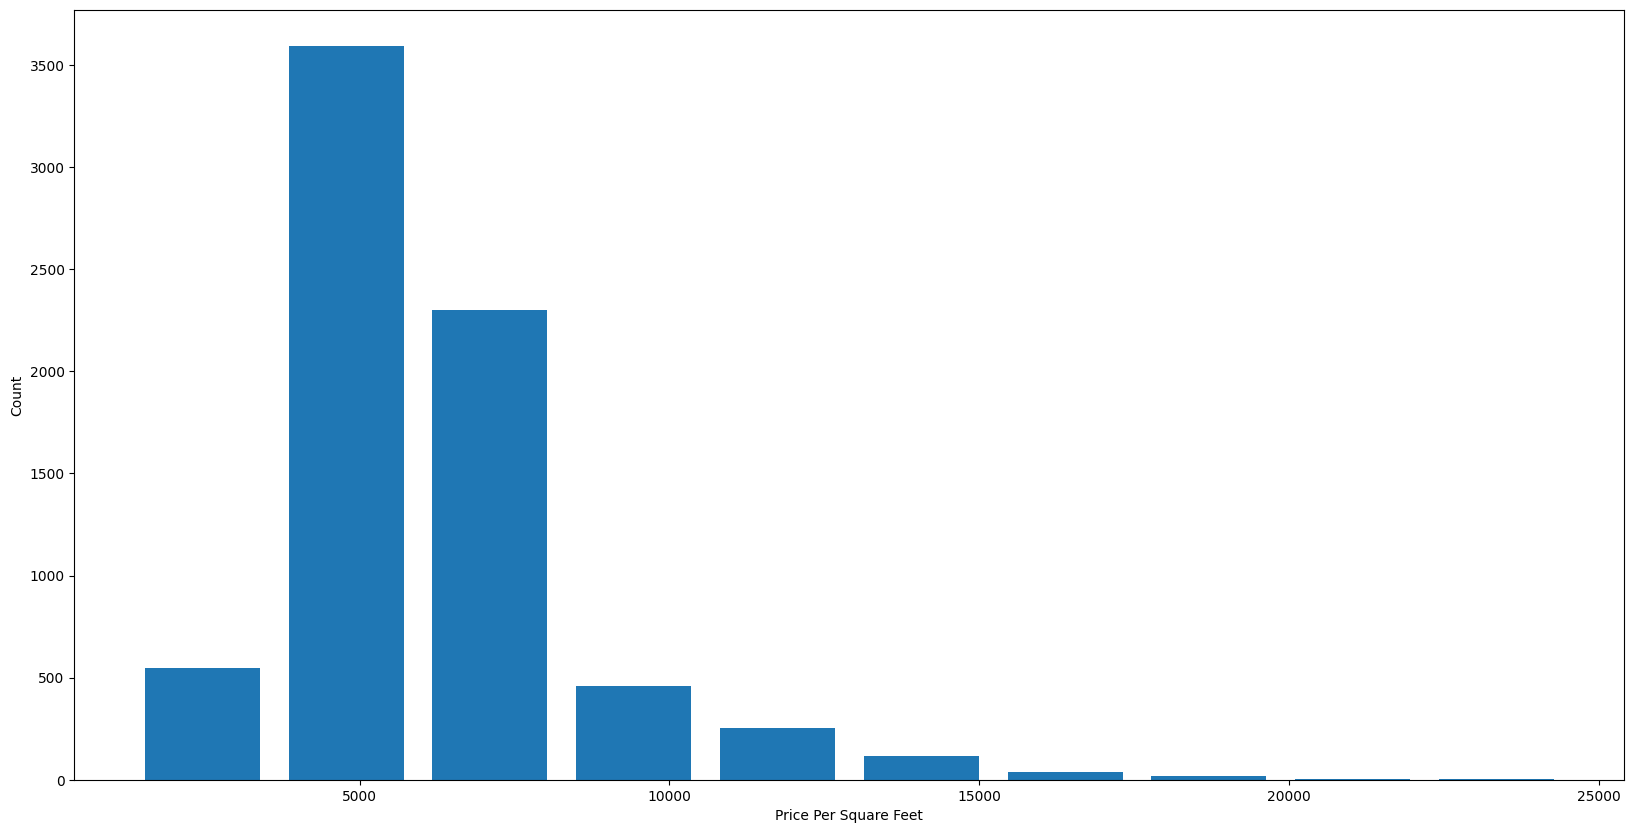

In [130]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data_6.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [131]:
data_6['bath'].value_counts()

bath
2.0     4198
3.0     1763
1.0      568
4.0      503
5.0      175
6.0       81
7.0       16
8.0       13
9.0        7
12.0       3
16.0       1
13.0       1
Name: count, dtype: int64

Text(0, 0.5, 'Count')

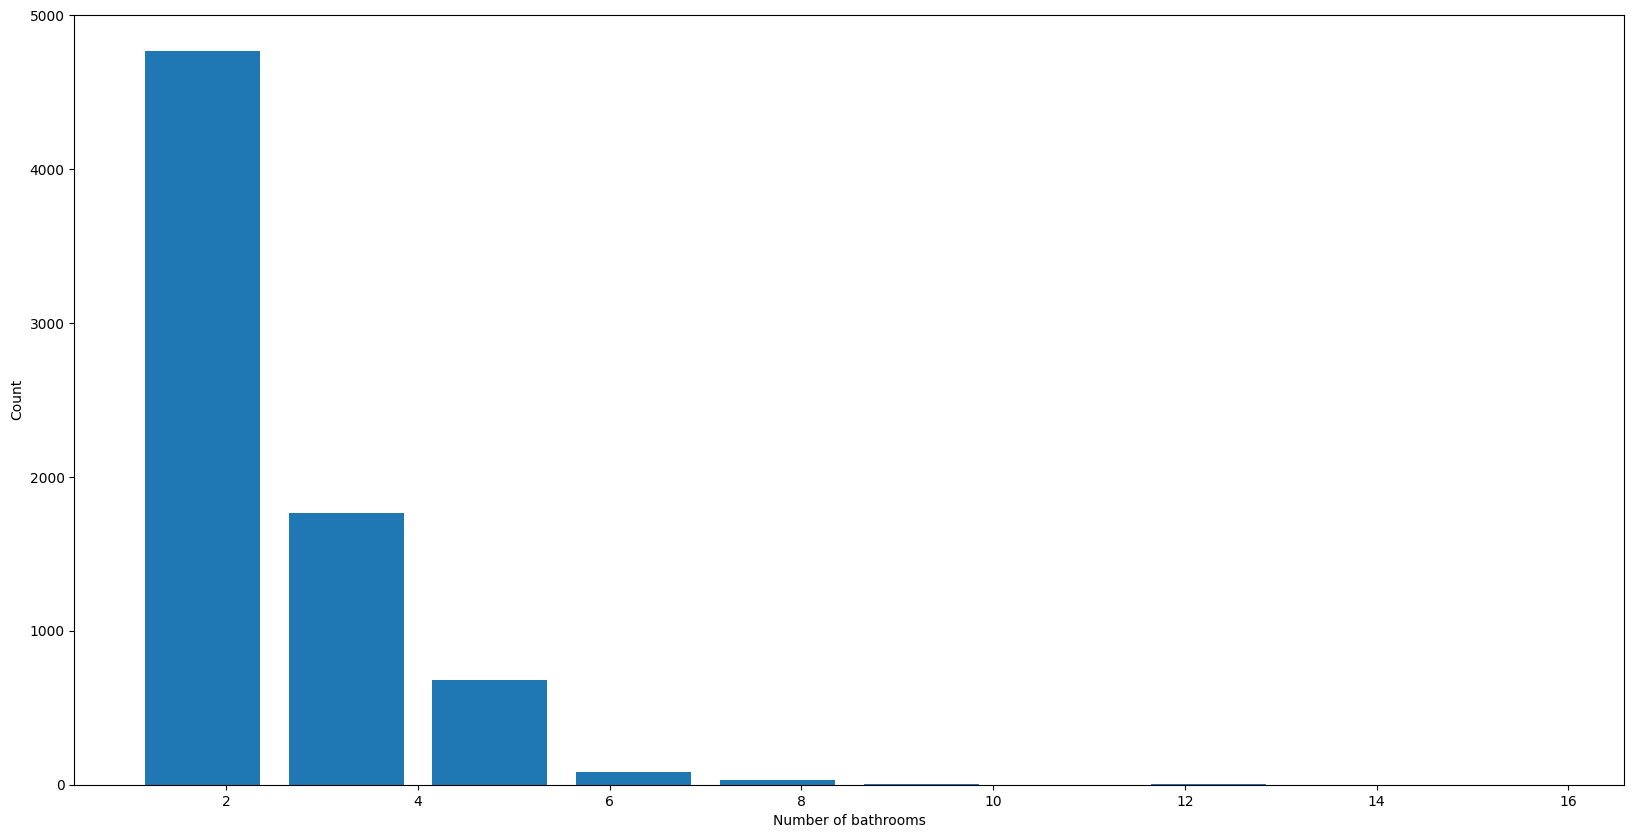

In [132]:
plt.hist(data_6.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [133]:
data_6[data_6.bath>data_6.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [134]:
data_7 = data_6[data_6.bath<data_6.bhk+2]

In [135]:
data_7.shape

(7251, 7)

In [136]:
data_8 = data_7.drop(['size','price_per_sqft'],axis='columns')
data_8.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [137]:
dummies = pd.get_dummies(data_8['location']).astype(int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
data_9 = pd.concat([data_8,dummies.drop('other',axis = 1)],axis = 1)

In [139]:
data_9.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
data_10 = data_9.drop('location',axis = 1)

In [141]:
X = data_10.drop('price',axis = 1)

In [142]:
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
y = data_10.price

In [144]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

## Model Training and Evaluation

- Split the dataset into training and testing sets.
- Train a linear regression model.
- Evaluate model performance using performance evaluation metrics.


In [145]:
!pip install scikit-learn


In [146]:
!pip install --upgrade scikit-learn


In [147]:
from sklearn.model_selection import train_test_split


In [148]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=10)

In [149]:
X_train.shape

(5800, 244)

In [150]:
X_test.shape

(1451, 244)

In [151]:
from sklearn.linear_model import LinearRegression

In [152]:
Lr_model = LinearRegression()

In [153]:
Lr_model.fit(X_train,y_train)

LinearRegression()

In [154]:
Lr_model.score(X_test,y_test)

0.8452277697874374

In [155]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [156]:
cv = ShuffleSplit(n_splits = 5, train_size=0.7,random_state = 10)

In [157]:
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.87934708, 0.81949511, 0.8641203 , 0.84433588, 0.84602088])

In [158]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [159]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

,model,best_score,best_params
0,linear_regression,0.818354,{}
1,lasso,0.687429,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.712618,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [160]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return Lr_model.predict([x])[0]

In [161]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(86.80519395230952)

In [162]:
predict_price('Whitefield',800, 3, 3)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(40.781460493137594)

In [163]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(181.2781548400642)

In [164]:
file_path = r'C:\Users\Admin\Desktop\Real-Estate-Price\model.pkl'

In [165]:
import pickle
with open(file_path, 'wb') as file:
    pickle.dump(Lr_model, file)

In [166]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

## Interactive Price Prediction

An interactive feature has been added to make testing the model easier. It includes:
- A dropdown menu for selecting the location.
- Sliders for inputting BHK, bathrooms, and area size.
- A button to display the predicted price.

This feature is unique to this implementation.


In [167]:
!pip install ipywidgets


In [168]:
!python -m pip install --upgrade --force-reinstall ipywidgets


  Obtaining dependency information for ipywidgets from https://files.pythonhosted.org/packages/22/2d/9c0b76f2f9cc0ebede1b9371b6f317243028ed60b90705863d493bae622e/ipywidgets-8.1.5-py3-none-any.whl.metadata
  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
  Obtaining dependency information for comm>=0.1.3 from https://files.pythonhosted.org/packages/e6/75/49e5bfe642f71f272236b5b2d2691cf915a7283cc0ceda56357b61daa538/comm-0.2.2-py3-none-any.whl.metadata
  Using cached comm-0.2.2-py3-none-any.whl.metadata (3.7 kB)
  Obtaining dependency information for ipython>=6.1.0 from https://files.pythonhosted.org/packages/04/60/d0feb6b6d9fe4ab89fe8fe5b47cbf6cd936bfd9f1e7ffa9d0015425aeed6/ipython-8.31.0-py3-none-any.whl.metadata
  Using cached ipython-8.31.0-py3-none-any.whl.metadata (4.9 kB)
  Obtaining dependency information for traitlets>=4.3.1 from https://files.pythonhosted.org/packages/00/c0/8f5d070730d7836adc9c9b6408dec68c6ced86b304a9b26a14df072a6e8c/traitlets-5.14.3-py3-none-a

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
python-lsp-server 1.7.2 requires jedi<0.19.0,>=0.17.2, but you have jedi 0.19.2 which is incompatible.
spyder 5.4.3 requires jedi<0.19.0,>=0.17.2, but you have jedi 0.19.2 which is incompatible.


    Uninstalling comm-0.2.2:
      Successfully uninstalled comm-0.2.2
  Attempting uninstall: ipython
    Found existing installation: ipython 8.31.0
    Uninstalling ipython-8.31.0:
      Successfully uninstalled ipython-8.31.0
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 8.1.5
    Uninstalling ipywidgets-8.1.5:
      Successfully uninstalled ipywidgets-8.1.5


In [169]:
!pip install jupyter-contrib-nbextensions


In [170]:
import ipywidgets as widgets
from ipywidgets import interact




In [171]:


# Interactive widgets for user input
location_widget = widgets.Dropdown(
    options=[col for col in X.columns if isinstance(col, str)],  # Location columns
    description='Location:',
    disabled=False
)

sqft_widget = widgets.IntSlider(
    value=1000,
    min=100,
    max=10000,
    step=100,
    description='Area (sqft):',
    disabled=False
)

bath_widget = widgets.IntSlider(
    value=3,
    min=1,
    max=10,
    step=1,
    description='Bathrooms:',
    disabled=False
)

bhk_widget = widgets.IntSlider(
    value=3,
    min=1,
    max=10,
    step=1,
    description='Bedrooms:',
    disabled=False
)

# Display the prediction
def display_prediction(location, sqft, bath, bhk):
    # Call the predict_price function with all the required arguments
    price = predict_price(location, sqft, bath, bhk)
    print(f"The predicted price for this property is ₹{price:,.2f}")

# Create an interactive display for the model
interact(display_prediction, location=location_widget, sqft=sqft_widget, bath=bath_widget, bhk=bhk_widget);


interactive(children=(Dropdown(description='Location:', options=('total_sqft', 'bath', 'bhk', '1st Block Jayan…

In [172]:
predict_price('1st Block Jayanagar',1000, 3, 3)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(205.29812624819454)

### Note
The interactive feature implementation is available in this notebook but not deployed as a web application.


## Pending Work

The following aspects from the Codebasics tutorial are not included in this project:
- Deployment of the model using Flask, HTML, and CSS.
